In [3]:
! pip install py2neo
! pip install wikipedia

     |████████████████████████████████| 71kB 2.3MB/s 
     |████████████████████████████████| 81kB 4.6MB/s 
     |████████████████████████████████| 184kB 53.9MB/s 
     |████████████████████████████████| 348kB 20.6MB/s 
     |████████████████████████████████| 849kB 53.0MB/s 
  Created wheel for py2neo: filename=py2neo-4.3.0-py2.py3-none-any.whl size=88305 sha256=83c9b7a37ef04ff6ee42a6f73a8eb1aaba5b7cb2febce11ac21ac5f337351a59
  Stored in directory: /root/.cache/pip/wheels/86/7d/e3/35bd456d80e796ba1f98730b629352ebab5294c942e8fdd826
  Created wheel for neobolt: filename=neobolt-1.7.16-cp36-cp36m-linux_x86_64.whl size=517034 sha256=bb1f5c666e71251843f92fa507d36b96fb12b4b5c5773b92d7c420e2df0a33a5
  Stored in directory: /root/.cache/pip/wheels/8e/51/2b/623ff6538b9f4bc9368d568a5873b765f1178fe9af807d1296
  Created wheel for neotime: filename=neotime-1.7.4-cp36-none-any.whl size=20543 sha256=5c10ccfc63e21c5686838707fd9b1dba6106c1bff235b2c42cb36a249444e2b9
  Stored in directory: /root/.cache/pi

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=ef4237e36c7566908bc54f2a4354afb8270679fb0cf3a24ba0c99da3c90be82d
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [0]:
import wikipedia
import networkx as nx

In [0]:
links = []
def is_here(l):
  for elem in links:
    k = (l[1], l[0])
    if l == elem or k == elem:
      return 0
  return 1


def search(str, f):
  if f < 12:
    a = str.split()
    near = wikipedia.search(a)
    for elem in near:
      if is_here((elem, str)):    
        links.append((str, elem))
        search(elem, f+1)
  return
    
search('Lermontov', 0)



Кол-во верин 1852
Кол-во ребер 4281


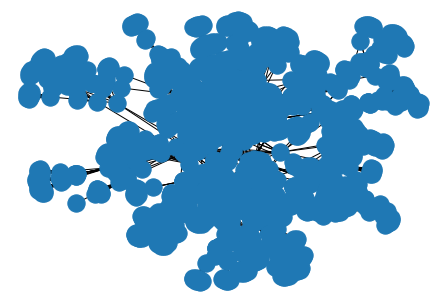

In [22]:
g = nx.Graph()
g.add_edges_from(links)
print("Кол-во верин", g.number_of_nodes())
print("Кол-во ребер", g.number_of_edges())
nx.draw(g)